In [2]:
!pip install impyute
!pip install ppscore

  Created wheel for ppscore: filename=ppscore-0.0.2-py2.py3-none-any.whl size=9629 sha256=954f45ba9062551bcc2d5fb4cc23990813c38b1fd8a69eaa20c88b5ffffd3e18
  Stored in directory: /root/.cache/pip/wheels/29/32/a2/82782fc09f5cd68e401ff047201d38af8965fb94984db18aa5
Successfully built ppscore


In [0]:
import pandas as pd
import numpy as np

import re

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import scipy.stats as sts

from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import GradientBoostingClassifier

from sklearn.preprocessing import MinMaxScaler

from sklearn.impute import KNNImputer

from sklearn.model_selection import RandomizedSearchCV

from pprint import pprint

# Import label encoder 
from sklearn import preprocessing 
from sklearn.metrics import precision_recall_fscore_support as score

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

from sklearn.feature_selection import VarianceThreshold

from impyute.imputation.cs import mice
# !pip install impyute

from sklearn.decomposition import PCA

In [0]:
bond_ratings = pd.read_csv('bond_ratings.csv')
fund_allocations = pd.read_csv('fund_allocations.csv')
fund_config = pd.read_csv('fund_config.csv')
fund_ratios = pd.read_csv('fund_ratios.csv')
fund_specs = pd.read_csv('fund_specs.csv')
other_specs = pd.read_csv('other_specs.csv')
return_3year = pd.read_csv('return_3year.csv')
return_5year = pd.read_csv('return_5year.csv')
return_10year = pd.read_csv('return_10year.csv')

In [0]:
fund_ratios['ps_ratio'] = fund_ratios.ps_ratio.str.replace(',','')
fund_ratios['mmc'] = fund_ratios.mmc.str.replace(',','')
fund_ratios['pc_ratio'] = fund_ratios.pc_ratio.str.replace(',','')
fund_ratios['pe_ratio'] = fund_ratios.pe_ratio.str.replace(',','')

fund_ratios['ps_ratio'] = fund_ratios.ps_ratio.astype('float')
fund_ratios['pc_ratio'] = fund_ratios.pc_ratio.astype('float')
fund_ratios['pe_ratio'] = fund_ratios.pe_ratio.astype('float')
fund_ratios['mmc'] = fund_ratios.mmc.astype('float')

In [0]:
other_specs['ps_ratio'] = other_specs.ps_ratio.str.replace(',','')
other_specs['mmc'] = other_specs.mmc.str.replace(',','')
other_specs['pc_ratio'] = other_specs.pc_ratio.str.replace(',','')
other_specs['pe_ratio'] = other_specs.pe_ratio.str.replace(',','')

other_specs['ps_ratio'] = other_specs.ps_ratio.astype('float')
other_specs['pc_ratio'] = other_specs.pc_ratio.astype('float')
other_specs['pe_ratio'] = other_specs.pe_ratio.astype('float')
other_specs['mmc'] = other_specs.mmc.astype('float')

In [0]:
other_specs.drop(columns=['pc_ratio','pb_ratio','pe_ratio','mmc','ps_ratio'],inplace=True)

In [0]:
return_3year['3yrs_treynor_ratio_fund'] = return_3year['3yrs_treynor_ratio_fund'].str.replace(',','')

return_3year['3yrs_treynor_ratio_fund'] = return_3year['3yrs_treynor_ratio_fund'].astype('float')

In [0]:
return_5year['5yrs_treynor_ratio_fund'] = return_5year['5yrs_treynor_ratio_fund'].str.replace(',','')

return_5year['5yrs_treynor_ratio_fund'] = return_5year['5yrs_treynor_ratio_fund'].astype('float')

In [0]:
return_10year['10yrs_treynor_ratio_fund'] = return_10year['10yrs_treynor_ratio_fund'].str.replace(',','')

return_10year['10yrs_treynor_ratio_fund'] = return_10year['10yrs_treynor_ratio_fund'].astype('float')

## **Correlation**

In [0]:
def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (abs(corr_matrix.iloc[i, j]) >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
                if colname in dataset.columns:
                    del dataset[colname] # deleting the column from the dataset

    print(col_corr)

In [0]:
correlation(bond_ratings,0.8)

{'b_rating'}


In [0]:
#Coulmn -> fund_allocations
correlation(fund_allocations,0.8)

set()


In [0]:
#Coulmn -> fund_ratios
correlation(fund_ratios,0.8)

set()


In [0]:
#Coulmn -> fund_specs
correlation(fund_specs,0.8)

set()


In [0]:

#Coulmn -> other_specs
correlation(other_specs,0.8)

{'2013_category_return', '2011_return_fund', '2016_return_category', 'fund_return_3months', '3_months_return_category', '2014_return_fund', '2017_return_fund', '2010_return_category', 'bond_percentage_of_porfolio', 'ytd_return_category', '2018_return_fund', '2012_fund_return'}


In [0]:
#Coulmn -> return_3year
correlation(return_3year,0.8)

{'3years_fund_std', '3_years_return_category', 'fund_return_3years', '3years_category_r_squared'}


In [0]:
#Coulmn -> return_5year
correlation(return_5year,0.8)

{'5_years_return_category', '5years_category_std', '5_years_return_fund', '5years_fund_r_squared'}


In [0]:
#Coulmn -> return_10year
correlation(return_10year,0.8)

{'10years_category_std', '10years_fund_r_squared', '10_years_return_category', '10_years_alpha_category', '10_years_return_mean_annual_fund'}


## **Merging**

In [0]:
# [fund_config,fund_ratios]
fund_con_rat = fund_config.merge(fund_ratios,on='fund_id')

In [0]:
# [fund_config , fund_ratios , fund_specs]
# fund_con_rat.columns.intersection(fund_specs.columns)
fund_con_rat_specs = fund_con_rat.merge(fund_specs,on='tag')

In [0]:
# [fund_config , fund_ratios , fund_specs , other_specs]
# fund_specs.columns.intersection(other_specs.columns)
fund_con_rat_specs_otherspecs = fund_con_rat_specs.merge(other_specs,on='tag')

In [0]:
# [fund_config , fund_ratios , fund_specs , other_specs , return_3year]
# other_specs.columns.intersection(return_3year.columns)
fund_con_rat_specs_otherspecs_3 = fund_con_rat_specs_otherspecs.merge(return_3year,on='tag')

In [0]:
# [fund_config , fund_ratios , fund_specs , other_specs , return_3year , return_5year]
# return_3year.columns.intersection(return_5year.columns)
fund_con_rat_specs_otherspecs_3_5 = fund_con_rat_specs_otherspecs_3.merge(return_5year,on='tag')

In [0]:
# [fund_config , fund_ratios , fund_specs , other_specs , return_3year , return_5year , return_10year]
# return_5year.columns.intersection(return_10year.columns)
fund_con_rat_specs_otherspecs_3_5_10 = fund_con_rat_specs_otherspecs_3_5.merge(return_10year,on='fund_id')

In [0]:
# [fund_config , fund_ratios , fund_specs , other_specs , return_3year , return_5year , return_10year , bond_ratings]
# fund_con_rat_specs_otherspecs_3_5_10.columns.intersection(bond_ratings.columns)
fund_con_rat_specs_otherspecs_3_5_10_BRate = fund_con_rat_specs_otherspecs_3_5_10.merge(bond_ratings,on='tag')

In [0]:
# [fund_config , fund_ratios , fund_specs , other_specs , return_3year , return_5year , return_10year , bond_ratings , fund_allocations]
fund_con_rat_specs_otherspecs_3_5_10_BRate_alloc = fund_con_rat_specs_otherspecs_3_5_10_BRate.merge(fund_allocations,left_on='tag',right_on='id')

In [0]:
# fund_con_rat_specs_otherspecs_3_5_10_BRate_alloc.to_csv('colmerge_colab.csv',index=False)

In [0]:
final = fund_con_rat_specs_otherspecs_3_5_10_BRate_alloc.copy()

In [0]:
final.shape

(25000, 101)

### **Checking Variance in each varaible**

In [0]:
# sel = VarianceThreshold()
# sel.fit_transform(final)

In [0]:
final.currency.unique()

array(['USD'], dtype=object)

In [0]:
final.drop(columns=['currency'],inplace=True)

In [0]:
final.us_govt_bond_rating.unique()

array([ 0., nan])

In [0]:
final.drop(columns=['us_govt_bond_rating'],inplace=True)

In [0]:
#df -> final
correlation(final,0.80)

{'10years_category_r_squared', '5_years_beta_fund', 'category_r_squared_5years', '5_years_alpha_category', 'id', '5_years_beta_category', '3_years_return_mean_annual_fund', 'greatstone_rating_y', '5_years_return_mean_annual_fund', '3years_category_std', '10_years_alpha_fund', '10years_fund_std', 'ytd_return_fund'}


In [0]:
# final = pd.concat([final,fund_con_rat_specs_otherspecs_3_5_10_BRate_alloc.greatstone_rating_y],axis=1)

In [0]:
# final['inception_date'] = pd.to_datetime(final['inception_date'])
# final.head()
# final.info()
# final = final.convert_dtypes()
final.shape

(25000, 99)

In [0]:
final.select_dtypes(include='object').head()

,category,parent_company,fund_id,fund_name,investment_class,inception_date,fund_size
0,Energy Limited Partnership,DWS,264614c6-5ac3-4146-ba26-1674b136cb40,DWS RREEF MLP & Energy Infrastructure Fund - C...,Value,2015-02-02,Large
1,Large Growth,Janus Henderson,f5ad58c2-fdea-4087-8678-e04744f89f90,Janus Henderson Research Fund Class N,Growth,2012-05-30,Large
2,Large Growth,Calvert Research and Management,3c13f4ab-02c4-4ca7-a133-7e996ec5d0c4,Calvert Equity Fund Class A,Growth,1987-08-23,Large
3,Large Value,Invesco,ff78bdd8-59eb-4cef-9f3c-b1baacce9554,Invesco Diversified Dividend Fund R5 Class,Value,2005-10-24,Large
4,Target-Date 2035,PGIM Funds (Prudential),63d8406d-c525-494a-8e03-d4fc4cfcb571,Prudential Day One 2035 Fund Class R3,Blend,2016-12-12,Large


In [0]:
# Since fund_id unique, it has all 25k labels
final.drop(columns=['fund_id'],inplace=True)

In [0]:
final['inception_date'] = pd.to_datetime(final['inception_date'])

# final['inception_year'] = 2020 - final['inception_date'].dt.year

final['inception_year'] = final['inception_date'].dt.year
final['inception_month'] = final['inception_date'].dt.month
final['inception_day'] = final['inception_date'].dt.day

In [0]:
final.drop(columns='inception_date',inplace=True)

In [0]:
# final.select_dtypes(include='string')
categ_col = list(final.select_dtypes(include='object').columns)
final[categ_col].isna().sum()

category               0
parent_company         0
fund_name              0
investment_class    1480
fund_size           1480
dtype: int64

In [0]:
final[categ_col] = final[categ_col].fillna(value = 'MISSING')

In [0]:
final[categ_col].isna().sum()

category            0
parent_company      0
fund_name           0
investment_class    0
fund_size           0
dtype: int64

In [0]:
final.fund_size.unique()

array(['Large', 'MISSING', 'Medium', 'Small'], dtype=object)

In [0]:
# final['fund_size'] = final['fund_size'].map({'Small':0,'Medium':1,'Large':2})
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
final['fund_size'] = labelencoder.fit_transform(final['fund_size'])
final.fund_size[25:35]

25    3
26    0
27    3
28    2
29    0
30    1
31    2
32    0
33    0
34    0
Name: fund_size, dtype: int64

In [0]:
#missing is replaced with 1
final.fund_size.unique()

array([0, 1, 2, 3])

In [0]:
print(final.investment_class.unique())
final.investment_class[27:31]

['Value' 'Growth' 'Blend' 'MISSING']


27     Growth
28      Value
29      Blend
30    MISSING
Name: investment_class, dtype: object

In [0]:
final['investment_class'] = labelencoder.fit_transform(final['investment_class'])
print(final.investment_class.unique())
#missing is replaced with 2
final.investment_class[27:31]

[3 1 0 2]


27    1
28    3
29    0
30    2
Name: investment_class, dtype: int64

In [0]:
#replace 1 in fund_size and 2 in investment_class with NA
final.loc[final.fund_size == 1,'fund_size'] = np.nan
final.loc[final.investment_class == 2,'investment_class'] = np.nan

In [0]:
final[['fund_size','investment_class']].info()
# final.fund_size.astype('float')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   fund_size         23520 non-null  float64
 1   investment_class  23520 non-null  float64
dtypes: float64(2)
memory usage: 585.9 KB


In [0]:
imputed = mice(final[['fund_size','investment_class']].values)

In [0]:
final[['fund_size','investment_class']] = imputed

In [0]:
final[['fund_size','investment_class']][:5]
# final.investment_class[27:31]

,fund_size,investment_class
0,0.0,3.0
1,0.0,1.0
2,0.0,1.0
3,0.0,3.0
4,0.0,0.0


In [0]:
final.select_dtypes(include='object').head()

,category,parent_company,fund_name
0,Energy Limited Partnership,DWS,DWS RREEF MLP & Energy Infrastructure Fund - C...
1,Large Growth,Janus Henderson,Janus Henderson Research Fund Class N
2,Large Growth,Calvert Research and Management,Calvert Equity Fund Class A
3,Large Value,Invesco,Invesco Diversified Dividend Fund R5 Class
4,Target-Date 2035,PGIM Funds (Prudential),Prudential Day One 2035 Fund Class R3


In [0]:
final.select_dtypes(exclude=['int','float']).describe(include='O').T

,count,unique,top,freq
category,25000,111,Large Growth,1335
parent_company,25000,761,Fidelity Investments,966
fund_name,25000,24958,Calamos Investment Trust - Calamos Focus Growt...,4


In [0]:
final = pd.get_dummies(final, columns=["parent_company"], prefix=["PC"],drop_first=True)

In [0]:
final.shape

(25000, 859)

In [0]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(final.loc[:,"PC_13D Activist Fund":'PC_Ziegler'])
df_parent = pd.DataFrame(data = principalComponents
             , columns = ['parent1', 'parent2'])

In [0]:
# pca.explained_variance_ratio_
parent_col = list(final.loc[:,"PC_13D Activist Fund":'PC_Ziegler'].columns)
final.drop(columns=parent_col,inplace=True)
final = pd.concat([final, df_parent], axis = 1)

In [0]:
final.shape

(25000, 99)

***Creating new class from fund_name***

In [0]:
#  global classes
# classes = []
def Classes(series):
  # fin = a = b = 0
  if "Class" in series:
    # fin = a = b = 0
    # print('True')
    dd = re.search(r'([A-Z0-9-]{0,8})\s*(Class)\s*([A-Z0-9-]{0,8})',series)
    # fin = a = b = 0
    if dd.groups()[0] == '' and dd.groups()[2] != '':
      fin = dd.groups()[1]+ "_" + dd.groups()[2]
      # classes.append(fin)
    elif dd.groups()[0] != '' and dd.groups()[2] == '':
      fin = dd.groups()[1] +"_"+ dd.groups()[0]
      # classes.append(fin)
    elif dd.groups()[0] != '' and dd.groups()[2] != '':
      fin = dd.groups()[1] +"_"+ dd.groups()[0] + '_' + dd.groups()[2]
      # classes.append(fin)
    else:
      fin = 'No_Class'
      # classes.append(fin) 
  else:
    dd = re.search(r'([A-Z0-9-]{0,8})$',series)
    if len(dd.group()) !=0 :
      fin = 'Class' + '_' + dd.group()
      # classes.append(fin)
    else:
      fin = 'No_Class'
      # classes.append(fin)
  return fin


In [0]:
final['fund_name_class'] = final['fund_name'].apply(Classes)


In [0]:
def ClassCheck(x):
  if x != 'No_Class':
    alpha = x.split('_')[1][0]
    return 'Class_'+alpha
  else:
    return x

In [0]:
final['fund_name_class'] = final['fund_name_class'].str.replace('-','').str.replace('__','_').apply(ClassCheck)

In [0]:
final.shape

(25000, 860)

In [0]:
final.fund_name_class.unique()

array(['Class_S', 'Class_N', 'Class_A', 'Class_R', 'Class_C', 'Class_Y',
       'No_Class', 'Class_I', 'Class_2', 'Class_T', 'Class_K', 'Class_F',
       'Class_E', 'Class_D', 'Class_B', 'Class_Z', 'Class_M', 'Class_5',
       'Class_3', 'Class_L', 'Class_1', 'Class_W', 'Class_H', 'Class_P',
       'Class_J', 'Class_4', 'Class_O', 'Class_V', 'Class_G', 'Class_U'],
      dtype=object)

In [0]:
index= final.fund_name_class[final['fund_name_class'].str.replace('-','').str.replace('__','_').apply(lambda x:x.split('_')[1]).apply(lambda x:x.isnumeric())].index

In [0]:
final.fund_name_class.loc[index] = 'No_Class'

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [0]:
final.fund_name_class.unique()

array(['Class_S', 'Class_N', 'Class_A', 'Class_R', 'Class_C', 'Class_Y',
       'No_Class', 'Class_I', 'Class_T', 'Class_K', 'Class_F', 'Class_E',
       'Class_D', 'Class_B', 'Class_Z', 'Class_M', 'Class_L', 'Class_W',
       'Class_H', 'Class_P', 'Class_J', 'Class_O', 'Class_V', 'Class_G',
       'Class_U'], dtype=object)

In [0]:
# https://www.thebalance.com/mutual-fund-shares-class-types-2466743
final['fund_name_class'] = labelencoder.fit_transform(final['fund_name_class'])

In [0]:
# final['fund_name_class'].unique()
final.loc[final.fund_name_class == 24,'fund_name_class'] = np.nan

In [0]:
final['fund_name_class'].unique()

array([17., 13.,  0., 16.,  2., 22., nan,  8., 18., 10.,  5.,  4.,  3.,
        1., 23., 12., 11., 21.,  7., 15.,  9., 14., 20.,  6., 19.])

In [0]:
final.head(3)

,tag,fund_ratio_net_annual_expense,pb_ratio,ps_ratio,mmc,pc_ratio,pe_ratio,investment_class,total_assets,yield,greatstone_rating_x,fund_size,return_ytd,2014_category_return,2012_return_category,years_up,2018_return_category,category_return_1year,cash_percent_of_portfolio,2011_return_category,ytd_return_fund,years_down,category_return_1month,2013_return_fund,2017_category_return,1_year_return_fund,2015_return_fund,portfolio_convertable,portfolio_others,2016_return_fund,stock_percent_of_portfolio,2010_return_fund,fund_return_3years,greatstone_rating_y,category_ratio_net_annual_expense,category_return_2015,1_month_fund_return,portfolio_preferred,3yrs_treynor_ratio_fund,3_years_alpha_fund,...,5yrs_treynor_ratio_category,5_years_alpha_category,5_years_beta_category,10years_category_r_squared,10yrs_sharpe_ratio_fund,10_years_alpha_fund,10years_fund_std,10yrs_sharpe_ratio_category,10_years_beta_fund,10yrs_treynor_ratio_fund,10_years_return_mean_annual_category,10yrs_treynor_ratio_category,10_years_return_fund,10_years_beta_category,bb_rating,below_b_rating,others_rating,a_rating,aaa_rating,aa_rating,bbb_rating,portfolio_communication_allocation,portfolio_financial_services,portfolio_industrials_allocation,portfolio_tech_allocation,portfolio_materials_basic_allocation,portfolio_energy_allocation,portfolio_consumer_defence_allocation,portfolio_healthcare_allocation,portfolio_property_allocation,id,portfolio_utils_allocation,portfolio_cyclical_consumer_allocation,inception_year,inception_month,inception_day,fund_name_class,new_category,parent1,parent2
0,67922,1.44,1.71,1.31,19857.41,5.91,14.51,3.0,1.185000e+07,5.57,NaN,0.0,20.19,NaN,NaN,1.0,-16.32,13.05,1.19,NaN,20.19,2.0,4.20,NaN,-5.78,18.40,NaN,0.0,0.00,16.14,98.81,NaN,4.24,NaN,1.75,-34.98,4.12,0.00,2.46,-7.10,...,-0.04,-0.11,0.01,0.49,NaN,NaN,NaN,0.01,NaN,NaN,0.01,0.21,0.00,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,67922,0.00,0.00,2015,2,2,17.0,6,-0.027175,-0.025378
1,134783,0.58,5.30,3.38,72347.03,15.95,18.88,1.0,1.397000e+10,0.42,3.0,0.0,16.79,10.0,15.34,5.0,-2.09,10.71,0.10,NaN,16.79,1.0,2.12,35.46,27.67,12.18,5.60,0.0,0.00,1.64,99.90,NaN,14.39,3.0,1.06,3.60,2.33,0.00,12.20,0.07,...,0.10,-0.00,0.01,0.88,1.16,0.16,14.30,0.01,1.08,15.57,0.01,0.15,17.25,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.78,9.77,9.97,35.51,2.86,0.38,5.88,14.41,2.67,134783,0.39,17.38,2012,5,30,13.0,4,-0.031328,-0.030745
2,61271,0.99,5.40,3.67,68857.43,15.97,23.27,1.0,2.660000e+09,0.02,4.0,0.0,17.13,10.0,15.34,26.0,-2.09,10.71,2.00,-2.46,17.13,5.0,2.12,30.42,27.67,19.77,3.68,0.0,0.22,2.32,97.12,17.23,16.42,4.0,1.06,3.60,3.77,0.08,17.88,4.32,...,0.10,-0.00,0.01,0.88,1.22,1.00,12.68,0.01,0.95,16.58,0.01,0.15,16.21,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.70,16.40,11.45,25.09,8.36,0.00,9.42,16.47,1.03,61271,0.00,7.09,1987,8,23,0.0,4,-0.021902,-0.019837


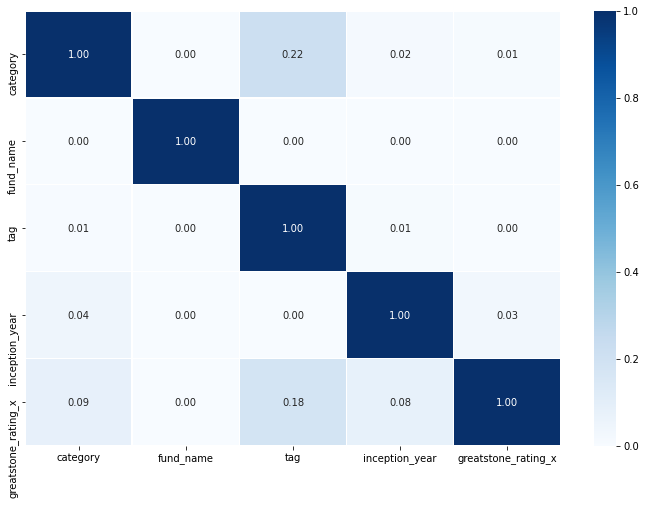

In [0]:
import ppscore as pps
# pps.score(final,['category'], "greatstone_rating_x")
col = list(final.select_dtypes(exclude=['int','float']).columns) + ['greatstone_rating_x']
import warnings
warnings.filterwarnings("ignore")
# pps.matrix(final.select_dtypes(exclude=['int','float']))
plt.figure(figsize=(12,8))
df_matrix = pps.matrix(final[col])
sns.heatmap(df_matrix, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True,fmt='0.2f')

In [0]:
final.drop(columns='fund_name',inplace=True)

In [0]:
final.head()

,category,tag,fund_ratio_net_annual_expense,pb_ratio,ps_ratio,mmc,pc_ratio,pe_ratio,investment_class,total_assets,yield,greatstone_rating_x,fund_size,return_ytd,2014_category_return,2012_return_category,years_up,2018_return_category,category_return_1year,cash_percent_of_portfolio,2011_return_category,ytd_return_fund,years_down,category_return_1month,2013_return_fund,2017_category_return,1_year_return_fund,2015_return_fund,portfolio_convertable,portfolio_others,2016_return_fund,stock_percent_of_portfolio,2010_return_fund,fund_return_3years,greatstone_rating_y,category_ratio_net_annual_expense,category_return_2015,1_month_fund_return,portfolio_preferred,3yrs_treynor_ratio_fund,...,PC_Virtus,PC_Vivaldi,PC_Volumetric,PC_Vontobel,PC_Voya,PC_Vulcan Value Partners,PC_WCM Investment Management,PC_WOA,PC_WP Trust,PC_Waddell & Reed,PC_Wall Street,PC_Walthausen Funds,PC_Wasatch,PC_Wasmer Schroeder,PC_Wavelength Funds,PC_Waycross,PC_Wealthfront,PC_Weiss,PC_Weitz,PC_Wells Fargo Advantage,PC_Wells Fargo Funds,PC_WesMark,PC_Westchester Capital,PC_Westfield Capital,PC_Westwood,PC_Wilbanks Smith & Thomas,PC_William Blair,PC_Williamsburg Investment Trust,PC_Wilmington Funds,PC_Wilshire Mutual Funds,PC_Wintergreen Funds,PC_Wireless,PC_World Funds Trust,PC_YCG FUNDS,PC_Yorktown Funds,PC_Zacks Funds,PC_Zeo,PC_Zevenbergen Capital Investments,PC_Ziegler,fund_name_class
0,Energy Limited Partnership,67922,1.44,1.71,1.31,19857.41,5.91,14.51,3.0,1.185000e+07,5.57,NaN,0.0,20.19,NaN,NaN,1.0,-16.32,13.05,1.19,NaN,20.19,2.0,4.20,NaN,-5.78,18.40,NaN,0.00,0.00,16.14,98.81,NaN,4.24,NaN,1.75,-34.98,4.12,0.00,2.46,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17.0
1,Large Growth,134783,0.58,5.30,3.38,72347.03,15.95,18.88,1.0,1.397000e+10,0.42,3.0,0.0,16.79,10.00,15.34,5.0,-2.09,10.71,0.10,NaN,16.79,1.0,2.12,35.46,27.67,12.18,5.60,0.00,0.00,1.64,99.90,NaN,14.39,3.0,1.06,3.60,2.33,0.00,12.20,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13.0
2,Large Growth,61271,0.99,5.40,3.67,68857.43,15.97,23.27,1.0,2.660000e+09,0.02,4.0,0.0,17.13,10.00,15.34,26.0,-2.09,10.71,2.00,-2.46,17.13,5.0,2.12,30.42,27.67,19.77,3.68,0.00,0.22,2.32,97.12,17.23,16.42,4.0,1.06,3.60,3.77,0.08,17.88,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
3,Large Value,64412,0.52,2.23,1.63,43266.62,8.93,12.70,3.0,1.957000e+10,2.71,3.0,0.0,11.63,10.21,14.57,11.0,-8.53,4.48,6.13,-0.75,11.63,2.0,0.46,29.31,15.94,7.11,2.09,0.00,0.00,14.66,93.87,15.63,6.85,3.0,1.00,-4.05,1.46,0.00,7.93,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,16.0
4,Target-Date 2035,184058,0.75,2.02,1.40,43747.90,7.59,14.74,0.0,2.847000e+07,2.44,0.0,0.0,10.25,NaN,NaN,1.0,-7.04,3.17,6.59,NaN,10.25,1.0,1.28,NaN,18.43,3.11,NaN,0.09,0.80,NaN,67.41,NaN,0.00,0.0,0.45,NaN,1.28,0.02,NaN,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,16.0


In [0]:
final.isnull().sum()

category                                 0
tag                                      0
fund_ratio_net_annual_expense            0
pb_ratio                               114
ps_ratio                               114
                                      ... 
PC_Zacks Funds                           0
PC_Zeo                                   0
PC_Zevenbergen Capital Investments       0
PC_Ziegler                               0
fund_name_class                       6791
Length: 859, dtype: int64

In [0]:
# values = mice(final.values)

In [0]:
# col =  list(final.columns)
# final = pd.DataFrame(imputed,columns=col)

In [0]:
# final['category'] = labelencoder.fit_transform(final['category'])
# final['parent_company'] = labelencoder.fit_transform(final['parent_company'])
# final['fund_id'] = labelencoder.fit_transform(final['fund_id'])
# final['fund_name'] = labelencoder.fit_transform(final['fund_name'])

In [0]:
# Generating new olumn from category
#All blends
ind_blend = final.category[final.category.str.contains('Blend')].index
final.loc[ind_blend,'new_category'] = 'blend'

ind_Growth = final.category[final.category.str.contains('Growth')].index
final.loc[ind_Growth,'new_category'] = 'growth'

ind_Value = final.category[final.category.str.contains('Value')].index
final.loc[ind_Value,'new_category'] = 'value'

#Target-Date
ind_tarDate = final.category[final.category.str.contains('Target-Date')].index
final.loc[ind_tarDate,'new_category'] = 'target-date'

#bond
ind_bond = final.category[final.category.str.contains('Bond')].index
final.loc[ind_bond,'new_category'] = 'bond'

ind_Allocation= final.category[final.category.str.contains('Allocation')].index
final.loc[ind_Allocation,'new_category'] = 'allocation'

# fund_conf.category[fund_conf.category.str.contains('Stock')].value_counts()
ind_Stock = final.category[final.category.str.contains('Stock')].index
final.loc[ind_Stock,'new_category'] = 'stock'

# fund_conf.category[fund_conf.category.str.contains('Muni')].value_counts()
ind_Muni = final.category[final.category.str.contains('Muni')].index
final.loc[ind_Muni,'new_category'] = 'muni'

# fund_conf.category[fund_conf.category.str.contains('Trading')]
ind_Trading = final.category[final.category.str.contains('Trading')].index
final.loc[ind_Trading,'new_category'] = 'trading'

# fund_conf.category[fund_conf.category.str.contains('Allocation')]
ind_AJapan_Stk = final.category[final.category == 'Pacific/Asia ex-Japan Stk'].index
final.loc[ind_AJapan_Stk,'new_category'] = 'stock'

ind_realestate = final.category[final.category.str.contains('Real Estate')].index
final.loc[ind_realestate,'new_category'] = 'realestate'

ind_Equity = final.category[final.category.str.contains('Equity')].index
final.loc[ind_Equity,'new_category'] = 'equity'

others = final.loc[final.new_category.isna()]['category'].index
final.loc[others,'new_category'] = 'others'

In [0]:
final.drop(columns='category',inplace=True)

In [0]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
final['new_category'] = labelencoder.fit_transform(final['new_category'])

In [0]:
(final.isnull().sum() * 100 / len(final)).sort_values(ascending=False)[:5]


maturity_bond           67.628
duration_bond           60.504
2010_return_fund        49.048
2011_return_category    42.132
2012_return_category    36.496
dtype: float64

In [0]:
final.loc[:,['maturity_bond','duration_bond']][:10]

,maturity_bond,duration_bond
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
5,NaN,NaN
6,NaN,NaN
7,NaN,NaN
8,NaN,NaN
9,7.34,4.84


In [0]:
final.drop(columns=['maturity_bond','duration_bond'],inplace=True)

In [0]:
# imputer = KNNImputer(n_neighbors=3)

# df_filled = imputer.fit_transform(final[categ_col])

In [0]:
# final = pd.get_dummies(final,columns=['investment_class'],drop_first=True)

In [0]:
final.shape

(25000, 857)

## Dealing Categorical

In [0]:
final.select_dtypes(exclude=['int','float']).describe(include='O').T

,count,unique,top,freq
category,25000,111,Large Growth,1335
parent_company,25000,761,Fidelity Investments,966
fund_id,25000,25000,899d1032-5253-4a14-baa9-c7a1e0fef991,1
fund_name,25000,24958,Calamos Investment Trust - Calamos Focus Growt...,4


In [0]:
col = list(final.select_dtypes(exclude=['int','float']).columns) + ['greatstone_rating_x']
col

['tag', 'inception_year', 'greatstone_rating_x']

In [0]:
# !pip install ppscore

In [0]:
# import ppscore as pps
# # pps.score(final,['category'], "greatstone_rating_x")
# import warnings
# warnings.filterwarnings("ignore")
# import seaborn as sns
# import matplotlib.pyplot as plt
# plt.figure(figsize=(12,8))
# df_matrix = pps.matrix(final[col])
# sns.heatmap(df_matrix, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True,fmt='0.2f')

In [0]:
final.drop(columns=['fund_id','fund_name'],inplace=True)
# final.drop(columns=['fund_id','fund_name','investment_class_Growth','investment_class_Value'],inplace=True)

In [0]:
col = list(final.select_dtypes(exclude=['int','float']).columns) + ['greatstone_rating_x']
col

['tag', 'inception_year', 'greatstone_rating_x']

In [0]:
# plt.figure(figsize=(12,8))
# df_matrix = pps.matrix(final[col])
# sns.heatmap(df_matrix, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True,fmt='0.2f')

### Dropping Category and parent_company coz they have too many labels

In [0]:
final.drop(columns=['category','parent_company'],inplace=True)

In [0]:
# final = pd.get_dummies(final,columns=['category','parent_company'],drop_first=True)

In [0]:
final.head()

In [0]:
# final.to_csv('Hack_colab.csv',index=False)

## Separating Target and Independent

In [0]:
target = final.loc[:,'greatstone_rating_x'].copy()

In [0]:
test_y = target[target.isna()]
y = target[target.notna()]

In [0]:
# target.isna().sum()
# target[target.isna()]

In [0]:
df_ind = final.loc[:,final.columns != 'greatstone_rating_x'].copy()
# df_ind = final.copy()

In [0]:
# sorted(df_ind.columns.to_list())

In [0]:
# df_ind.drop(columns='parent_company',inplace=True)

In [0]:
df_ind.head()

,tag,fund_ratio_net_annual_expense,pb_ratio,ps_ratio,mmc,pc_ratio,pe_ratio,investment_class,total_assets,yield,fund_size,return_ytd,2014_category_return,2012_return_category,years_up,2018_return_category,category_return_1year,cash_percent_of_portfolio,2011_return_category,ytd_return_fund,years_down,category_return_1month,2013_return_fund,2017_category_return,1_year_return_fund,2015_return_fund,portfolio_convertable,portfolio_others,2016_return_fund,stock_percent_of_portfolio,2010_return_fund,fund_return_3years,greatstone_rating_y,category_ratio_net_annual_expense,category_return_2015,1_month_fund_return,portfolio_preferred,3yrs_treynor_ratio_fund,3_years_alpha_fund,3years_category_std,...,PC_Vivaldi,PC_Volumetric,PC_Vontobel,PC_Voya,PC_Vulcan Value Partners,PC_WCM Investment Management,PC_WOA,PC_WP Trust,PC_Waddell & Reed,PC_Wall Street,PC_Walthausen Funds,PC_Wasatch,PC_Wasmer Schroeder,PC_Wavelength Funds,PC_Waycross,PC_Wealthfront,PC_Weiss,PC_Weitz,PC_Wells Fargo Advantage,PC_Wells Fargo Funds,PC_WesMark,PC_Westchester Capital,PC_Westfield Capital,PC_Westwood,PC_Wilbanks Smith & Thomas,PC_William Blair,PC_Williamsburg Investment Trust,PC_Wilmington Funds,PC_Wilshire Mutual Funds,PC_Wintergreen Funds,PC_Wireless,PC_World Funds Trust,PC_YCG FUNDS,PC_Yorktown Funds,PC_Zacks Funds,PC_Zeo,PC_Zevenbergen Capital Investments,PC_Ziegler,fund_name_class,new_category
0,67922,1.44,1.71,1.31,19857.41,5.91,14.51,3.0,1.185000e+07,5.57,0.0,20.19,NaN,NaN,1.0,-16.32,13.05,1.19,NaN,20.19,2.0,4.20,NaN,-5.78,18.40,NaN,0.00,0.00,16.14,98.81,NaN,4.24,NaN,1.75,-34.98,4.12,0.00,2.46,-7.10,0.18,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17.0,6
1,134783,0.58,5.30,3.38,72347.03,15.95,18.88,1.0,1.397000e+10,0.42,0.0,16.79,10.00,15.34,5.0,-2.09,10.71,0.10,NaN,16.79,1.0,2.12,35.46,27.67,12.18,5.60,0.00,0.00,1.64,99.90,NaN,14.39,3.0,1.06,3.60,2.33,0.00,12.20,0.07,0.13,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13.0,4
2,61271,0.99,5.40,3.67,68857.43,15.97,23.27,1.0,2.660000e+09,0.02,0.0,17.13,10.00,15.34,26.0,-2.09,10.71,2.00,-2.46,17.13,5.0,2.12,30.42,27.67,19.77,3.68,0.00,0.22,2.32,97.12,17.23,16.42,4.0,1.06,3.60,3.77,0.08,17.88,4.32,0.13,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,4
3,64412,0.52,2.23,1.63,43266.62,8.93,12.70,3.0,1.957000e+10,2.71,0.0,11.63,10.21,14.57,11.0,-8.53,4.48,6.13,-0.75,11.63,2.0,0.46,29.31,15.94,7.11,2.09,0.00,0.00,14.66,93.87,15.63,6.85,3.0,1.00,-4.05,1.46,0.00,7.93,-2.73,0.11,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,16.0,11
4,184058,0.75,2.02,1.40,43747.90,7.59,14.74,0.0,2.847000e+07,2.44,0.0,10.25,NaN,NaN,1.0,-7.04,3.17,6.59,NaN,10.25,1.0,1.28,NaN,18.43,3.11,NaN,0.09,0.80,NaN,67.41,NaN,0.00,0.0,0.45,NaN,1.28,0.02,NaN,NaN,0.08,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,16.0,9


In [0]:
# df_ind['inception_date'] = pd.to_datetime(df_ind['inception_date'])
# df_ind['inception_year'] = 2020 - df_ind['inception_date'].dt.year
# # df_ind['inception_year'] = df_ind['inception_date'].dt.year
# # df_ind['inception_month'] = df_ind['inception_date'].dt.month
# # df_ind['inception_day'] = df_ind['inception_date'].dt.day

In [0]:
# df_ind.drop(columns=['parent_company','fund_name'],inplace=True)

## Dealing Outliers

## Filling outliers with median

In [0]:
# df_ind[np.abs(sts.zscore(df_ind['yield'])) > 3]['yield'] 
# df_ind[np.abs(sts.zscore(df_ind['yield'])) < 3]['yield'].mean()

In [0]:
for i in range(len(df_ind.columns)):
    # print(df_ind.columns[i])
    # print('*'*30)
    # print(len(df_ind.loc[np.abs(sts.zscore(df_ind[df_ind.columns[i]],nan_policy='omit')) > 3,df_ind.columns[i]]))
    #fill outliers with NAN
    index = df_ind.loc[np.abs(sts.zscore(df_ind[df_ind.columns[i]],nan_policy='omit')) > 3,df_ind.columns[i]].index
    df_ind[df_ind.columns[i]][index] = df_ind[df_ind.columns[i]].median() 
    #take median of each column
#     median = X.loc[(sts.zscore(X[X.columns[i]])) < 3,X.columns[i]].median()
    #fill NAN values with median
#     X[X.columns[i]].fillna(median,inplace=True)
#     print(len(X.loc[np.abs(sts.zscore(X[X.columns[i]],nan_policy='omit')) > 3,X.columns[i]]))
#     print(f'After filling median : {len(X.loc[(sts.zscore(X[X.columns[i]],nan_policy='omit')) > 3,X.columns[i]])}\n')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in greater
  


In [0]:
df_ind.mmc.max()

115159.44

In [0]:
# for i in range(len(df_ind_mean.columns)):
#     index = df_ind_mean.loc[np.abs(sts.zscore(df_ind_mean[df_ind_mean.columns[i]],nan_policy='omit')) > 3,df_ind_mean.columns[i]].index
#     df_ind_mean[df_ind_mean.columns[i]][index] = df_ind_mean[df_ind_mean.columns[i]].median() 

## **PCA**

In [0]:
# # 'category','parent_company'
# df_ind.columns.to_list()

In [0]:
# from sklearn.decomposition import PCA
# pca = PCA(n_components=2)
# principalComponents = pca.fit_transform(df_ind.loc[:,"parent_company_13D Activist Fund":'parent_company_Ziegler'])
# df_parent = pd.DataFrame(data = principalComponents
#              , columns = ['parent1', 'parent2'])

In [0]:
# parent_col = list(df_ind.loc[:,"parent_company_13D Activist Fund":'parent_company_Ziegler'].columns)
# df_ind.drop(columns=parent_col,inplace=True)
# df_ind = pd.concat([df_ind, df_parent], axis = 1)

In [0]:
# pca = PCA(n_components=2)
# principalComponents = pca.fit_transform(df_ind.loc[:,'category_Allocation - 30% to 50% Equity':'category_World Small/Mid Stock'])
# df_category = pd.DataFrame(data = principalComponents
#              , columns = ['category1', 'category2'])

In [0]:
# category_col = list(df_ind.loc[:,'category_Allocation - 30% to 50% Equity':'category_World Small/Mid Stock'].columns)
# df_ind.drop(columns=category_col,inplace=True)
# df_ind = pd.concat([df_ind, df_parent], axis = 1)

In [0]:
# df_ind.isna().sum()

In [0]:
# df_ind.head()

In [0]:
# dfind_copy = df_ind.copy()
# correlation(fund_allocations,0.9)

In [0]:
# dfind_copy.columns


## **IterativeImputer**

In [0]:
imputer = IterativeImputer(RandomForestRegressor(n_estimators=7))
na_iterative = imputer.fit_transform(df_ind)
col =  list(df_ind.columns)
df_ind_iter = pd.DataFrame(na_iterative,columns=col)

/usr/local/lib/python3.6/dist-packages/sklearn/impute/_iterative.py:638: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)


In [0]:
df_ind_iter.isna().sum()

tag                              0
fund_ratio_net_annual_expense    0
pb_ratio                         0
ps_ratio                         0
mmc                              0
                                ..
inception_day                    0
fund_name_class                  0
new_category                     0
parent1                          0
parent2                          0
Length: 98, dtype: int64

In [0]:
# df_ind_iter.to_csv('Imputer.csv',index=False)
df_ind_iter = pd.read_csv('Imputer_1x_outlier.csv')

In [0]:

# final = pd.concat([final,fund_con_rat_specs_otherspecs_3_5_10_BRate_alloc.greatstone_rating_y],axis=1)

In [0]:
df_ind_iter.isna().sum()

tag                              0
fund_ratio_net_annual_expense    0
pb_ratio                         0
ps_ratio                         0
mmc                              0
                                ..
inception_day                    0
fund_name_class                  0
new_category                     0
parent1                          0
parent2                          0
Length: 98, dtype: int64

### **Correlation**

In [0]:
def heatmap(dataset):
    plt.figure(figsize=(45,40))
    plt.rcParams.update({'font.size': 10})
    matrix = np.triu(dataset.corr())
    sns.heatmap(dataset.corr(),annot=True,cmap = 'coolwarm',mask=matrix)

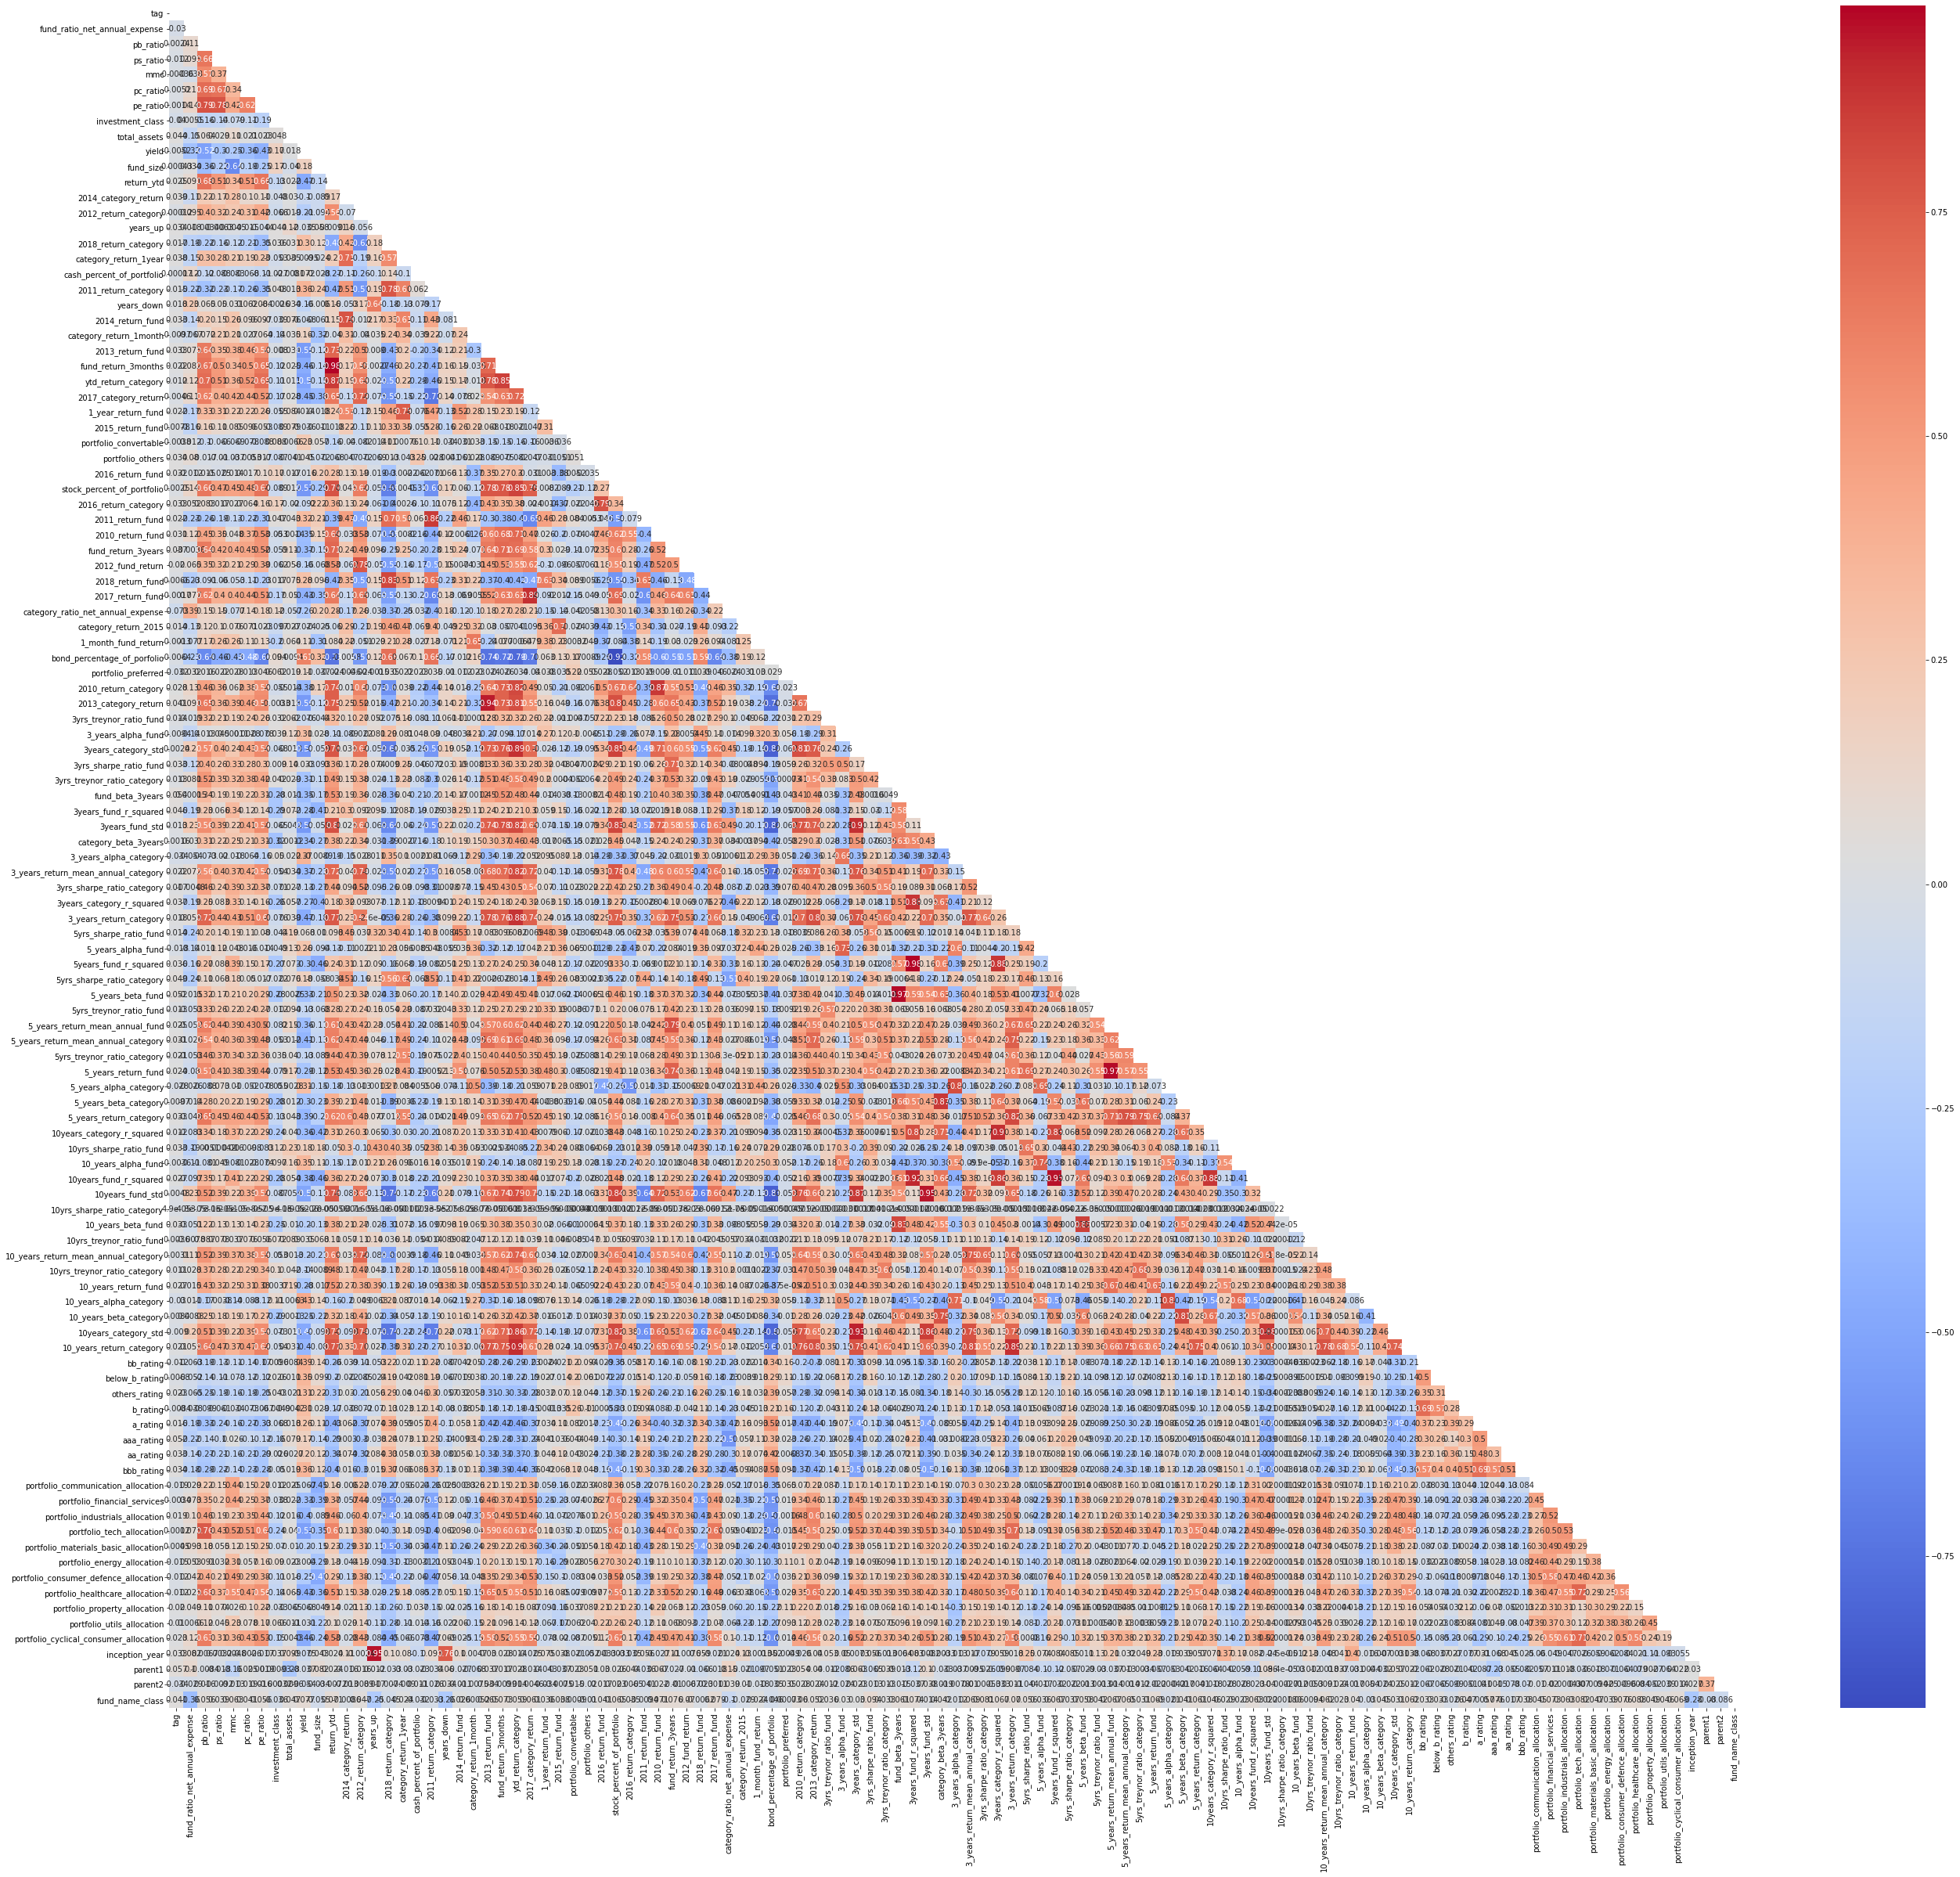

In [6]:
heatmap(df_ind_iter)

In [0]:
df_ind_iter['3Y10Y_10YCS']

In [0]:
pca = PCA(n_components=1)
df_ind_iter['FR_3M_Re'] = pca.fit_transform(df_ind_iter[['fund_return_3months','return_ytd']])
df_ind_iter['2011_R_F_C'] = pca.fit_transform(df_ind_iter[['2011_return_fund','2011_return_category']])
df_ind_iter['2018_R_F_C'] = pca.fit_transform(df_ind_iter[['2018_return_fund','2018_return_category']])
df_ind_iter['3Y_FS_CS'] = pca.fit_transform(df_ind_iter[['3years_fund_std','3years_category_std']])
df_ind_iter['2013_CR_RF'] = pca.fit_transform(df_ind_iter[['2013_category_return','2013_return_fund']])
df_ind_iter['2017_CR_RF'] = pca.fit_transform(df_ind_iter[['2017_return_fund','2017_category_return']])
df_ind_iter['3Y_CRS_FRS'] = pca.fit_transform(df_ind_iter[['3years_category_r_squared','3years_fund_r_squared']])
df_ind_iter['2010_R_F_C'] = pca.fit_transform(df_ind_iter[['2010_return_fund','2010_return_category']])
df_ind_iter['5YBF_FB3Y'] = pca.fit_transform(df_ind_iter[['5_years_beta_fund','fund_beta_3years']])
df_ind_iter['5YR_F_MAF'] = pca.fit_transform(df_ind_iter[['5_years_return_fund','5_years_return_mean_annual_fund']])
df_ind_iter['IY_YU_YD'] = pca.fit_transform(df_ind_iter[['inception_year','years_up','years_down']])
df_ind_iter['10YFRS_5YFRS_3YCF'] = pca.fit_transform(df_ind_iter[['10years_fund_r_squared','5years_fund_r_squared','3Y_CRS_FRS']])
df_ind_iter['3YFC_10YFS'] = pca.fit_transform(df_ind_iter[['3Y_FS_CS','10years_fund_std']])
df_ind_iter['BPOP_SPOP'] = pca.fit_transform(df_ind_iter[['bond_percentage_of_porfolio','stock_percent_of_portfolio']])
df_ind_iter['10YRC_YRC'] = pca.fit_transform(df_ind_iter[['10_years_return_category','ytd_return_category']])
df_ind_iter['5YBC_CB3Y'] = pca.fit_transform(df_ind_iter[['5_years_beta_category','category_beta_3years']])
df_ind_iter['5YAC_3YAC'] = pca.fit_transform(df_ind_iter[['5_years_alpha_category','3_years_alpha_category']])
df_ind_iter['10YY_3YRC'] = pca.fit_transform(df_ind_iter[['10YRC_YRC','3_years_return_category']])
df_ind_iter['3Y10Y_10YCS'] = pca.fit_transform(df_ind_iter[['3YFC_10YFS','10years_category_std']])
df_ind_iter['5Y3Y_10YAC'] = pca.fit_transform(df_ind_iter[['5YAC_3YAC','10_years_alpha_category']])
df_ind_iter['10Y3Y_F3R'] = pca.fit_transform(df_ind_iter[['10YY_3YRC','FR_3M_Re']])
df_ind_iter['10YF_BPSP'] = pca.fit_transform(df_ind_iter[['10Y3Y_F3R','BPOP_SPOP']])
df_ind_iter['5YF_10YBF'] = pca.fit_transform(df_ind_iter[['5YBF_FB3Y','10_years_beta_fund']])
df_ind_iter['10Y5Y3Y_10YCRS'] = pca.fit_transform(df_ind_iter[['10YFRS_5YFRS_3YCF','10years_category_r_squared']])
df_ind_iter['5YC_10YBC'] = pca.fit_transform(df_ind_iter[['5YBC_CB3Y','10_years_beta_category']])
df_ind_iter['10YB_3Y10Y'] = pca.fit_transform(df_ind_iter[['10YF_BPSP','3Y10Y_10YCS']])
df_ind_iter['10Y3Y_2013CR'] = pca.fit_transform(df_ind_iter[['10YB_3Y10Y','2013_CR_RF']])

In [0]:
df_ind_iter.drop(columns=['fund_return_3months','return_ytd'],inplace=True)
df_ind_iter.drop(columns=['2011_return_fund','2011_return_category'],inplace=True)
df_ind_iter.drop(columns=['2018_return_fund','2018_return_category'],inplace=True)
df_ind_iter.drop(columns=['3years_fund_std','3years_category_std'],inplace=True)
df_ind_iter.drop(columns=['2013_category_return','2013_return_fund'],inplace=True)
df_ind_iter.drop(columns=['2017_return_fund','2017_category_return'],inplace=True)
df_ind_iter.drop(columns=['3years_category_r_squared','3years_fund_r_squared'],inplace=True)
df_ind_iter.drop(columns=['2010_return_fund','2010_return_category'],inplace=True)
df_ind_iter.drop(columns=['5_years_beta_fund','fund_beta_3years'],inplace=True)
df_ind_iter.drop(columns=['5_years_return_fund','5_years_return_mean_annual_fund'],inplace=True)
df_ind_iter.drop(columns=['inception_year','years_up','years_down'],inplace=True)
df_ind_iter.drop(columns=['10years_fund_r_squared','5years_fund_r_squared','3Y_CRS_FRS'],inplace=True)
df_ind_iter.drop(columns=['3Y_FS_CS','10years_fund_std'],inplace=True)
df_ind_iter.drop(columns=['bond_percentage_of_porfolio','stock_percent_of_portfolio'],inplace=True)
df_ind_iter.drop(columns=['10_years_return_category','ytd_return_category'],inplace=True)
df_ind_iter.drop(columns=['5_years_beta_category','category_beta_3years'],inplace=True)
df_ind_iter.drop(columns=['5_years_alpha_category','3_years_alpha_category'],inplace=True)
df_ind_iter.drop(columns=['10YRC_YRC','3_years_return_category'],inplace=True)
df_ind_iter.drop(columns=['3YFC_10YFS','10years_category_std'],inplace=True)
df_ind_iter.drop(columns=['5YAC_3YAC','10_years_alpha_category'],inplace=True)
df_ind_iter.drop(columns=['10YY_3YRC','FR_3M_Re'],inplace=True)
df_ind_iter.drop(columns=['10Y3Y_F3R','BPOP_SPOP'],inplace=True)
df_ind_iter.drop(columns=['5YBF_FB3Y','10_years_beta_fund'],inplace=True)
df_ind_iter.drop(columns=['10YFRS_5YFRS_3YCF','10years_category_r_squared'],inplace=True)
df_ind_iter.drop(columns=['5YBC_CB3Y','10_years_beta_category'],inplace=True)
df_ind_iter.drop(columns=['10YF_BPSP','3Y10Y_10YCS'],inplace=True)
df_ind_iter.drop(columns=['10YB_3Y10Y','2013_CR_RF'],inplace=True)

In [0]:
df_ind_iter

,tag,fund_ratio_net_annual_expense,pb_ratio,ps_ratio,mmc,pc_ratio,pe_ratio,investment_class,total_assets,yield,fund_size,return_ytd,2014_category_return,2012_return_category,years_up,2018_return_category,category_return_1year,cash_percent_of_portfolio,2011_return_category,ytd_return_fund,years_down,category_return_1month,2013_return_fund,2017_category_return,1_year_return_fund,2015_return_fund,portfolio_convertable,portfolio_others,2016_return_fund,stock_percent_of_portfolio,2010_return_fund,fund_return_3years,greatstone_rating_y,category_ratio_net_annual_expense,category_return_2015,1_month_fund_return,portfolio_preferred,3yrs_treynor_ratio_fund,3_years_alpha_fund,3years_category_std,...,5yrs_treynor_ratio_category,5_years_alpha_category,5_years_beta_category,10years_category_r_squared,10yrs_sharpe_ratio_fund,10_years_alpha_fund,10years_fund_std,10yrs_sharpe_ratio_category,10_years_beta_fund,10yrs_treynor_ratio_fund,10_years_return_mean_annual_category,10yrs_treynor_ratio_category,10_years_return_fund,10_years_beta_category,bb_rating,below_b_rating,others_rating,a_rating,aaa_rating,aa_rating,bbb_rating,portfolio_communication_allocation,portfolio_financial_services,portfolio_industrials_allocation,portfolio_tech_allocation,portfolio_materials_basic_allocation,portfolio_energy_allocation,portfolio_consumer_defence_allocation,portfolio_healthcare_allocation,portfolio_property_allocation,id,portfolio_utils_allocation,portfolio_cyclical_consumer_allocation,inception_year,inception_month,inception_day,fund_name_class,new_category,parent1,parent2
0,67922.0,1.44,1.71,1.31,19857.41,5.91,14.51,3.0,1.185000e+07,5.57,0.0,20.19,7.46,4.29,1.0,-16.32,13.05,1.19,8.47,20.19,2.0,1.11,31.244286,-5.78,18.40,-0.717143,0.00,0.00,16.140000,98.81,19.485714,4.24,2.142857,1.75,-1.69,4.12,0.00,2.460000,-7.100000,0.18,...,-0.04,-0.00,0.01,0.49,0.654286,-5.005714,17.252857,0.01,1.067143,7.975714,0.01,0.21,0.00,0.01,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.38,0.00,0.00,0.00,67922.0,0.00,0.00,2015.0,2.0,2.0,17.0,6.0,-0.027175,-0.025378
1,134783.0,0.58,5.30,3.38,72347.03,15.95,18.88,1.0,1.397000e+10,0.42,0.0,16.79,10.00,15.34,5.0,-2.09,10.71,0.10,-2.46,16.79,1.0,2.12,35.460000,27.67,12.18,5.600000,0.00,0.00,1.640000,99.90,21.151429,14.39,3.000000,1.06,3.60,2.33,0.00,12.200000,0.070000,0.13,...,0.10,-0.00,0.01,0.88,1.160000,0.160000,14.300000,0.01,1.080000,15.570000,0.01,0.15,17.25,0.01,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.78,9.77,9.97,35.51,2.86,0.38,5.88,14.41,2.67,134783.0,0.39,17.38,2012.0,5.0,30.0,13.0,4.0,-0.031328,-0.030745
2,61271.0,0.99,5.40,3.67,68857.43,15.97,23.27,1.0,2.660000e+09,0.02,0.0,17.13,10.00,15.34,26.0,-2.09,10.71,2.00,-2.46,17.13,5.0,2.12,30.420000,27.67,19.77,3.680000,0.00,0.22,2.320000,97.12,17.230000,16.42,4.000000,1.06,3.60,3.77,0.08,17.880000,4.320000,0.13,...,0.10,-0.00,0.01,0.88,1.220000,1.000000,12.680000,0.01,0.950000,16.580000,0.01,0.15,16.21,0.01,0.0,0.00,0.0,0.00,0.0,0.00,0.00,4.70,16.40,11.45,25.09,8.36,0.00,9.42,16.47,1.03,61271.0,0.00,7.09,1987.0,8.0,23.0,0.0,4.0,-0.021902,-0.019837
3,64412.0,0.52,2.23,1.63,43266.62,8.93,12.70,3.0,4.417900e+08,2.71,0.0,11.63,10.21,14.57,11.0,-8.53,4.48,6.13,-0.75,11.63,2.0,0.46,29.310000,15.94,7.11,2.090000,0.00,0.00,14.660000,93.87,15.630000,6.85,3.000000,1.00,-4.05,1.46,0.00,7.930000,-2.730000,0.11,...,0.07,-0.03,0.01,0.90,1.200000,0.750000,11.210000,0.01,0.840000,16.380000,0.01,0.14,14.12,0.01,0.0,0.00,0.0,0.00,0.0,0.00,0.00,6.53,13.80,10.91,0.16,2.22,6.79,4.84,9.00,0.00,64412.0,0.43,5.43,2005.0,10.0,24.0,16.0,11.0,-0.064508,-0.090523
4,184058.0,0.75,2.02,1.40,43747.90,7.59,14.74,0.0,2.847000e+07,2.44,0.0,10.25,5.24,14.64,1.0,-7.04,3.17,6.59,-3.51,10.25,1.0,1.28,19.145714,18.43,3.11,1.098571,0.09,0.80,3.312857,67.41,10.342857,0.00,0.000000,0.45,-1.76,1.28,0.02,-2.024286,-3.794286,0.08,...,0.04,-0.01,0.01,0.97,0.860000,-3.117143,11.031429,0.01,1.262857,0.581429,0.01,0.08,0.00,0.01,0.0,0.00,0.0,0.00,0.0,0.00,0.00,3.49,13.95,10.51,19.26,3.75,5.11,7.29,12.22,10.41,184058.0

In [0]:
# df_ind_iter.to_csv('Imputer_corr.csv',index=False)
df_ind_iter = pd.read_csv('Imputer_corr.csv')

In [0]:
df_ind_iter.shape

(25000, 98)

In [0]:
# df_ind_iter.columns.to_list()
# df_ind_iter['greatstone_rating_y'] = fund_con_rat_specs_otherspecs_3_5_10_BRate_alloc['greatstone_rating_y']

In [0]:
# df_ind_iter = pd.concat([df_ind_iter,fund_con_rat_specs_otherspecs_3_5_10_BRate_alloc.greatstone_rating_y],axis=1)

In [0]:
df_ind_iter.drop(columns=['parent1','parent2'],inplace=True)

In [0]:
df_ind_iter.isna().sum()

tag                                 0
fund_ratio_net_annual_expense       0
pb_ratio                            0
ps_ratio                            0
mmc                                 0
                                 ... 
5YF_10YBF                           0
10Y5Y3Y_10YCRS                      0
5YC_10YBC                           0
10Y3Y_2013CR                        0
greatstone_rating_y              5000
Length: 81, dtype: int64

## **Replacing NAN with Mean**

In [0]:
# df_ind_mean = df_ind_iter.fillna(df_ind_iter.mean())

# df_ind_mean = df_ind.fillna(df_ind.mean())

# df_ind_mean = df_ind.fillna(df_ind.median())
# df_ind_mean = df_ind.fillna(0)
# df_ind_mean.isna().sum()
df_ind_mean = df_ind_iter

In [0]:
df_ind_mean.head()

,tag,fund_ratio_net_annual_expense,pb_ratio,ps_ratio,mmc,pc_ratio,pe_ratio,investment_class,total_assets,yield,fund_size,return_ytd,2014_category_return,2012_return_category,years_up,2018_return_category,category_return_1year,cash_percent_of_portfolio,2011_return_category,ytd_return_fund,years_down,category_return_1month,2013_return_fund,2017_category_return,1_year_return_fund,2015_return_fund,portfolio_convertable,portfolio_others,2016_return_fund,stock_percent_of_portfolio,2010_return_fund,fund_return_3years,greatstone_rating_y,category_ratio_net_annual_expense,category_return_2015,1_month_fund_return,portfolio_preferred,3yrs_treynor_ratio_fund,3_years_alpha_fund,3years_category_std,...,5yrs_treynor_ratio_category,5_years_alpha_category,5_years_beta_category,10years_category_r_squared,10yrs_sharpe_ratio_fund,10_years_alpha_fund,10years_fund_std,10yrs_sharpe_ratio_category,10_years_beta_fund,10yrs_treynor_ratio_fund,10_years_return_mean_annual_category,10yrs_treynor_ratio_category,10_years_return_fund,10_years_beta_category,bb_rating,below_b_rating,others_rating,a_rating,aaa_rating,aa_rating,bbb_rating,portfolio_communication_allocation,portfolio_financial_services,portfolio_industrials_allocation,portfolio_tech_allocation,portfolio_materials_basic_allocation,portfolio_energy_allocation,portfolio_consumer_defence_allocation,portfolio_healthcare_allocation,portfolio_property_allocation,id,portfolio_utils_allocation,portfolio_cyclical_consumer_allocation,inception_year,inception_month,inception_day,fund_name_class,new_category,parent1,parent2
0,67922.0,1.44,1.71,1.31,19857.41,5.91,14.51,3.0,1.185000e+07,5.57,0.0,20.19,7.46,4.29,1.0,-16.32,13.05,1.19,8.47,20.19,2.0,1.11,31.244286,-5.78,18.40,-0.717143,0.00,0.00,16.140000,98.81,19.485714,4.24,2.142857,1.75,-1.69,4.12,0.00,2.460000,-7.100000,0.18,...,-0.04,-0.00,0.01,0.49,0.654286,-5.005714,17.252857,0.01,1.067143,7.975714,0.01,0.21,0.00,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,3.38,0.00,0.00,0.00,67922.0,0.00,0.00,2015.0,2.0,2.0,17.0,6.0,-0.027175,-0.025378
1,134783.0,0.58,5.30,3.38,72347.03,15.95,18.88,1.0,1.397000e+10,0.42,0.0,16.79,10.00,15.34,5.0,-2.09,10.71,0.10,-2.46,16.79,1.0,2.12,35.460000,27.67,12.18,5.600000,0.00,0.00,1.640000,99.90,21.151429,14.39,3.000000,1.06,3.60,2.33,0.00,12.200000,0.070000,0.13,...,0.10,-0.00,0.01,0.88,1.160000,0.160000,14.300000,0.01,1.080000,15.570000,0.01,0.15,17.25,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.78,9.77,9.97,35.51,2.86,0.38,5.88,14.41,2.67,134783.0,0.39,17.38,2012.0,5.0,30.0,13.0,4.0,-0.031328,-0.030745
2,61271.0,0.99,5.40,3.67,68857.43,15.97,23.27,1.0,2.660000e+09,0.02,0.0,17.13,10.00,15.34,26.0,-2.09,10.71,2.00,-2.46,17.13,5.0,2.12,30.420000,27.67,19.77,3.680000,0.00,0.22,2.320000,97.12,17.230000,16.42,4.000000,1.06,3.60,3.77,0.08,17.880000,4.320000,0.13,...,0.10,-0.00,0.01,0.88,1.220000,1.000000,12.680000,0.01,0.950000,16.580000,0.01,0.15,16.21,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.70,16.40,11.45,25.09,8.36,0.00,9.42,16.47,1.03,61271.0,0.00,7.09,1987.0,8.0,23.0,0.0,4.0,-0.021902,-0.019837
3,64412.0,0.52,2.23,1.63,43266.62,8.93,12.70,3.0,4.417900e+08,2.71,0.0,11.63,10.21,14.57,11.0,-8.53,4.48,6.13,-0.75,11.63,2.0,0.46,29.310000,15.94,7.11,2.090000,0.00,0.00,14.660000,93.87,15.630000,6.85,3.000000,1.00,-4.05,1.46,0.00,7.930000,-2.730000,0.11,...,0.07,-0.03,0.01,0.90,1.200000,0.750000,11.210000,0.01,0.840000,16.380000,0.01,0.14,14.12,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.53,13.80,10.91,0.16,2.22,6.79,4.84,9.00,0.00,64412.0,0.43,5.43,2005.0,10.0,24.0,16.0,11.0,-0.064508,-0.090523
4,184058.0,0.75,2.02,1.40,43747.90,7.59,14.74,0.0,2.847000e+07,2.44,0.0,10.25,5.24,14.64,1.0,-7.04,3.17,6.59,-3.51,10.25,1.0,1.28,19.145714,18.43,3.11,1.098571,0.09,0.80,3.312857,67.41,10.342857,0.00,0.000000,0.45,-1.76,1.28,0.02,-2.024286,-3.794286,0.08,...,0.04,-0.01,0.01,0.97,0.860000,-3.117143,11.031429,0.01,1.262857,0.581429,0.01,0.08,0.00,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.49,13.95,10.51,19.26,3.75,5.11,7.29,12.22,10.41,184058.0,3.07,10.95,2016.0,1

### **Replace NA with KNN**

In [0]:
imputer = KNNImputer(n_neighbors=5)

df_filled = imputer.fit_transform(df_ind)

In [0]:
col =  list(df_ind.columns)

In [0]:
df_ind_mean = pd.DataFrame(df_filled,columns=col)
# .isna().sum()

In [0]:
df_ind_mean.isnull().sum()

category                                  0
parent_company                            0
fund_id                                   0
fund_name                                 0
tag                                       0
                                         ..
portfolio_utils_allocation                0
portfolio_cyclical_consumer_allocation    0
inception_year                            0
inception_month                           0
inception_day                             0
Length: 126, dtype: int64

## **X & Y**

In [0]:
# # # target
# # target = mice(target.values)
# # # df_ind_iter
# imputer = IterativeImputer(RandomForestRegressor(n_estimators=10))
# na_iterative = imputer.fit_transform(target)
# df_ind_iter['target'] = na_iterative

In [0]:
# For mean
X = df_ind_mean.iloc[y.index]
test_X = df_ind_mean.iloc[test_y.index]

In [0]:
X.isna().sum()

tag                              0
fund_ratio_net_annual_expense    0
pb_ratio                         0
ps_ratio                         0
mmc                              0
                                ..
5YF_10YBF                        0
10Y5Y3Y_10YCRS                   0
5YC_10YBC                        0
10Y3Y_2013CR                     0
greatstone_rating_y              0
Length: 83, dtype: int64

In [0]:
# # KNN
# X = df_ind_mean.iloc[y.index]
# test_X = df_ind_mean.iloc[test_y.index]

In [0]:
# scaler = MinMaxScaler()
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X = scaler.fit_transform(X)
test_X = scaler.transform(test_X)

In [0]:
from sklearn.model_selection import train_test_split
# test_size = 0.1,random_state=13
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=13,test_size = 0.01)

In [0]:
X_train.shape,y_train.shape
# y.isna().sum()

((19800, 98), (19800,))

In [0]:
# X_train.shape,y_train.shape

In [0]:
#n_estimators = 1300, random_state = 14,max_leaf_nodes=1500 = 8764
rf = RandomForestClassifier(n_estimators = 990, random_state = 14)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=990,
                       n_jobs=None, oob_score=False, random_state=14, verbose=0,
                       warm_start=False)

In [0]:
rf.score(X_train, y_train)

1.0

In [0]:
rf.score(X_test,y_test)

1.0

In [0]:
y_pred = rf.predict(X_test)
# report = classification_report(y_test, y_pred)
# print(report)
precision,recall,fscore,support=score(y_test, y_pred,average='macro')
print('Precision : {}'.format(precision))

Precision : 1.0


In [0]:
out = rf.predict(test_X)
out

array([2., 3., 2., ..., 3., 2., 2.])

## GBoosting

In [0]:
gb_clf2 = GradientBoostingClassifier(n_estimators=1500, random_state=13)
gb_clf2.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=1500,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=13, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [0]:
gb_clf2.score(X_train, y_train)

0.9904705882352941

In [0]:
gb_clf2.score(X_test,y_test)

0.7843333333333333

In [0]:
out = gb_clf2.predict(test_X)
out

array([2., 3., 2., ..., 3., 2., 2.])

## OutPut File

In [0]:
# colmerge_colab = pd.read_csv('colmerge_colab.csv')

In [0]:
#80
input_ = fund_con_rat_specs_otherspecs_3_5_10_BRate_alloc.loc[fund_con_rat_specs_otherspecs_3_5_10_BRate_alloc.greatstone_rating_x.isna()]['fund_id']
final_out = pd.DataFrame({'fund_id':input_,'greatstone_rating':out})
final_out.reset_index(drop=True,inplace=True)
final_out.to_csv('Final_result.csv',index=False)


In [0]:
# input_.shape

In [0]:
# pd.set_option('display.max_columns', None)

In [0]:
X_train.shape

(17000, 87)

## Feature Selection

In [0]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

pd.Series(clf.feature_importances_, index=df_ind_mean.columns).plot.bar(color='steelblue', figsize=(12, 6))

In [0]:
imp = pd.Series(clf.feature_importances_, index=df_ind_mean.columns)
col_drop = list(imp[imp < 0.01].index)

In [0]:
# len(list(df_ind_iter.columns))
len(col_drop)

78

In [0]:
df_ind_mean.drop(columns=col_drop,inplace=True)

In [0]:
len(list(df_ind_mean.columns))

17

In [0]:
# df_ind_mean.isnull().sum()

In [0]:
# for i in range(len(list(df_ind.columns))):
#     df_ind[df_ind.columns[i]] = sts.zscore(df_ind[df_ind.columns[i]])

In [0]:
df_ind.head()

In [0]:
# for i in range(len(list(df_ind.columns))):
#     sns.boxplot(df_ind[df_ind.columns[i]])
#     plt.show()

In [0]:
# for i in range(len(list(df_ind.columns))):
#     df_ind[df_ind.columns[i]] = np.log(df_ind[df_ind.columns[i]])

In [0]:
# for i in range(len(list(df_ind.columns))):
#     sns.boxplot(df_ind[df_ind.columns[i]])
#     plt.show()

## Outlier Detection2

In [0]:
# from scipy import stats
# import numpy as np
# z = np.abs(stats.zscore(df_ind))
# print(z)

In [0]:
# index = X.loc[(sts.zscore(X['bb_rating'],nan_policy='omit')) > 3,'bb_rating'].index
# X.bb_rating[index] = X.bb_rating.median()
# # X.loc[(sts.zscore(X['bb_rating'],nan_policy='omit')) > 3,'bb_rating']
# # median =  X.loc[(sts.zscore(X['bb_rating'],nan_policy='omit')) <= 3,'bb_rating'].median()
# # # # X['bb_rating'] = X['bb_rating'].fillna(median)
# # median

In [0]:
# abs_z_scores = np.abs(z_scores)
# filtered_entries = (abs_z_scores < 3).all(axis=1)
# new_df = df[filtered_entries]

In [0]:
# (z < 3).all(axis=1)

In [0]:
# df_ind.loc[sts.zscore(df_ind['bb_rating']) > 3,'bb_rating']

In [0]:
# df = pd.DataFrame({'A':[1,5,1,4,np.nan],'B':[2,8,2,9,np.nan]})
# df

In [0]:
# for i in range(len(X.columns)):
# #     print(X.columns[i])
#     print(len(X.loc[np.abs(sts.zscore(X[X.columns[i]],nan_policy='omit')) > 3,X.columns[i]]))
    
#     index = X.loc[np.abs(sts.zscore(X[X.columns[i]],nan_policy='omit')) > 3,X.columns[i]].index
#     df_ind.drop(labels=index,inplace=True,errors='ignore')
#     print(len(X.loc[np.abs(sts.zscore(X[X.columns[i]],nan_policy='omit')) > 3,X.columns[i]]))

In [0]:
# index = X.loc[np.abs(sts.zscore(X['bb_rating'],nan_policy='omit')) > 3,'bb_rating'].index

In [0]:
# df_ind.drop(labels=index,inplace=True)

(25000, 82)

## **Random Hyperparameter Grid**

In [0]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [0]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 16.3min
